# ¿Que más se podría hacer?

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# Tome cualquiera de estas propuestas o alguna suya y desarrolle

### 1) Test con data augmentation y la LSTM

Se probo entrenar LSTM con y sin data augmentation, dando mejores resultados en términos de R2 incorporando data augmentation que se trata de una técnica para aumentar la diversidad de su conjunto de entrenamiento mediante la aplicación de transformaciones aleatorias (pero realistas). 

### 2) TSNE de embeddings y analizar si hay interpretación

Tanto en el entrenamiento de LSTM como en Textcnn se realizó el TSNE de embedding, como técnica de visualización que puede ayudar a encontrar patrones en los datos en espacios de menor dimensión. Pero en ninguno de los 2 casos se observan dichos patrones o algun agrupamiento sino que se observa una distribucion uniforme de los datos.

Al tener 38 caracteres en el vocabulario probamos de bajar a 2 el embedding y ver si al graficarlo se observan componentes que estén cerca. Aunque esto tiene sentido cuando la tokenizacion es por componente químico y no por caracter. 
Probamos la mitad de embeddings: 16, 8 y 2 para obligar que la clusterización quede en el embedding pero obtuvimos peores resultados en términos de R2.

### 3) Comparacion con el video

El contexto del trabajo se basa en la necesidad de entender la bioactividad de una molécula (molecule_chembl_id) sobre una enzima (Acetylcholinesterase), la cual se medirá en este caso con el IC50 (standard_value).El objetivo es encontrar drogas q reaccionen contra esta enzima particular 

En el video muestran como a partir de los datos preprocesados (tratamiento de nulos y duplicados etc), se utilizan tecnicas para transformar textos de las formulas químicas en números y obtener asi features de entrada. Esto lo hacen con 2 metodos Descriptores de Lipinski Fingerprints del tipo pubchem.
Se construye un modelo de regresión con RandomForest para estimar el pI50 (IC50 en escala logarítimica) dado los fingerprints de entrada


Las propuestas del trabajo es resolver el mismo problema usando Deep learning, entrando al modelo con texto (formula quimica) y con nlp y con un bloque de embedding extraer los features de manera automática en forma end to end. La extracción d feature se hace en el proceso de entrenamiento completo vs extracción de feature  y luego entrar al modelo de machine learning-

En Deep learning el concepto general es hacer todo end to end. Es decir que sea la arquitectura que elijo la que extraiga los features y luego esos features son los que entran en los modelos.


A continuación comparamos los resultados de todos los modelos:

**Random Forest (Video)**

1. Importo librarìas

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor




In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 74.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
from sklearn.utils._testing import ignore_warnings

2. Cargo el data set


Cargamos el dataset del video, una vez preprocesado el dataset (limpieza de datos) y aplicadas las técnicas para obtener features a partir de las formulas quimicas para luego construir un modelo de regresión con RandomForest para estimar el pI50 (IC50 en escala logarítimica) dado los fingerprints de entrada.

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-07-12 14:43:48--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-07-12 14:43:48--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubc

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

3. Input features

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

Remuevo features con baja varianza


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

4. Data split (80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [ ]:
X_test.shape, Y_test.shape


((939, 137), (939,))

5. Construcciòn del modelo de Regression usando Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.5145498653053225

In [ ]:
Y_pred_tr = model.predict(X_train)

In [ ]:

r2 = 1 - ((Y_train.values - Y_pred_tr.reshape(-1)) ** 2).sum() / ((Y_train - Y_train.mean()) ** 2).sum()
r2

0.8298896854090579

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
r2 = 1 - ((Y_test.values - Y_pred.reshape(-1)) ** 2).sum() / ((Y_test - Y_test.mean()) ** 2).sum()
r2

0.5145498653053225

Se puede ver que con RF obtenemos muy buenos resultados en términos de R2 para train pero no para test lo que nos muestra que está haciendo overfitting, o lo que es lo mismo se está sobreajustando a los datos.

6. Scatter Plot : Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

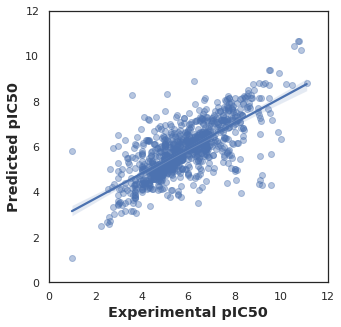

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### 4) Otros Metodos de ensamble

Se prueba la aplicación de Métodos de Ensamble

* LGBm
* GradientBoostingRegressor
* XGBRegressor

**LGBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgb.LGBMRegressor


lightgbm.sklearn.LGBMRegressor

In [ ]:
model = LGBMRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.5350437951662855

In [ ]:
Y_pred_tr = model.predict(X_train)

In [ ]:

r2 = 1 - ((Y_train.values - Y_pred_tr.reshape(-1)) ** 2).sum() / ((Y_train - Y_train.mean()) ** 2).sum()
r2

0.6860937451922722

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
r2 = 1 - ((Y_test.values - Y_pred.reshape(-1)) ** 2).sum() / ((Y_test - Y_test.mean()) ** 2).sum()
r2

0.5350437951662855

**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

In [ ]:

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.42421587538749594

In [ ]:
Y_pred_tr = model.predict(X_train)

In [ ]:

r2 = 1 - ((Y_train.values - Y_pred_tr.reshape(-1)) ** 2).sum() / ((Y_train - Y_train.mean()) ** 2).sum()
r2

0.46413863286862234

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
r2 = 1 - ((Y_test.values - Y_pred.reshape(-1)) ** 2).sum() / ((Y_test - Y_test.mean()) ** 2).sum()
r2

0.42421587538749594

**XGBRegressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:

model = XGBRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

[14:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.42016545896229307

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred_tr = model.predict(X_train)

In [ ]:

r2 = 1 - ((Y_train.values - Y_pred_tr.reshape(-1)) ** 2).sum() / ((Y_train - Y_train.mean()) ** 2).sum()
r2

0.4598341670931859

In [ ]:
r2 = 1 - ((Y_test.values - Y_pred.reshape(-1)) ** 2).sum() / ((Y_test - Y_test.mean()) ** 2).sum()
r2

0.42016545896229307

En estos casos los mejores resultados los obtuvimos con LGBMRegressor con un R2 en test de 0.53

### 5) Comparacion entre los disintos metodos

Comparando los resultados en test de los distintos modelos obtenemos los siguientes R2:

**1) Random Forest R2:0.5145**

**2) LGBM R2:0.5350**

   **GradientBoostingRegressor R2:0.4242**

   **XGBRegressor R2:0.4201**

**3) Modelo Recurrentes con Embeddings a nivel de caracter LSTM R2:0.6848**

**4) Modelo TXTCNN con generador, embedings de smiles y data-augmentation R2:0.7715**

En los 2 últimos casos vemos como aplicando Deep Learning sobre el mismo problema pudimos obtener mejores resultados que con el enfoque tradicional de Random Forest y de los metodos de ensamble evaluados.


En el 4to enfoque (TextCnn), respecto al modelo anterior (LSTM) no sólo se le cambio la arquitectura, sino también que tanto la data augementation como la tokenizacion se cambio con sentido quimico entonces eso hace que obtengamos mejores resultados con el modelo CNN con generador embeddingd de smiles y data augmentation. Por tal motivo en el próximo punto se presenta un LST con Data Aug y tokenizacion con sentido químico 

### 6)LSTM con data augmentation y tokenizacion con sentido quimico

In [2]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.7 MB/s 


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
PATH=r"/content/gdrive/MyDrive/bioinformatics_final_project-main/"


In [5]:
# Apunto a la carpeta del drive
import sys
import os

sys.path.append(os.path.abspath(PATH))

In [6]:

import pandas as pd
import numpy as np
from datagen import smiles_dict, smiles_to_seq

In [7]:
from dataaug import SmilesEnumerator, SmilesIterator
from datagen import DataGenerator, smiles_dict, smiles_to_seq

In [8]:
df = pd.read_csv(PATH+'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [9]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_sequence_len = len(df['canonical_smiles'].iloc[max_len_idx]) + 20

In [10]:
X = df['canonical_smiles'].values
y = df['pIC50'].values

In [11]:
from dataaug import SmilesEnumerator

In [12]:

sme = SmilesEnumerator()
for i in range(10):
    print(sme.randomize_smiles('CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1'))
    

C(C)Oc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
c1ccccc1COc1cc(-n2c(=O)oc(OCC)n2)ccc1
O=c1oc(OCC)nn1-c1cc(OCc2ccccc2)ccc1
c1c(OCc2ccccc2)cc(-n2nc(OCC)oc2=O)cc1
c1(-n2c(=O)oc(OCC)n2)cc(OCc2ccccc2)ccc1
O=c1oc(OCC)nn1-c1cc(OCc2ccccc2)ccc1
CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
c1(-n2nc(OCC)oc2=O)cc(OCc2ccccc2)ccc1
O(c1oc(=O)n(-c2cc(OCc3ccccc3)ccc2)n1)CC
C(C)Oc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1


In [13]:
dgen = DataGenerator(X, y, max_sequence_len, batch_size=16)

Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

In [16]:
X_train

array(['COc1ccc(C(F)(F)F)c[n+]1C.F[B-](F)(F)F',
       '[Cl-].[Cl-].c1cc[n+](COC[n+]2ccccc2)cc1',
       'CCOC(=O)C1=C(C)Oc2nc3c(c(N)c2[C@H]1c1ccccc1)CCCC3', ...,
       'O=[N+]([O-])c1ccccc1-c1nnc(Nc2ncccn2)o1',
       'COc1cc2c(cc1O)CCC(C)(CCNCCCCCCCNc1c3c(nc4cc(Cl)ccc14)CCCC3)O2',
       'CN(C)Cc1ccc(CSCCCCCCCSCc2ccc(CN(C)C)o2)o1'], dtype=object)

In [16]:
dgen_train = DataGenerator(X_train, y_train, seq_length=max_sequence_len, batch_size=128, data_augmentation=True)
dgen_test = DataGenerator(X_test, y_test, seq_length=max_sequence_len, batch_size=128, data_augmentation=False)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [18]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Armar modelo en keras de LSTM


In [19]:
# vocab_size = # Completar largo del vocabulario
vocab_size =len (smiles_dict)
print(vocab_size)

42


In [20]:
# Implementar modelo completo
cells =100
return_sequences =False
model =Sequential()
model.add(Embedding (vocab_size+1,64,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
model.add(Dense (50, activation='linear'))
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 227, 64)           2752      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [23]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [24]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [25]:
history = model.fit(dgen_train, epochs=300, batch_size=128, validation_data=dgen_test, callbacks=[])

Epoch 1/300
36/36 [==============================] - 64s 2s/step - loss: 13.3555 - R2: -4.3545 - val_loss: 7.3969 - val_R2: -1.6014
Epoch 2/300
36/36 [==============================] - 44s 1s/step - loss: 10.0601 - R2: -3.0148 - val_loss: 5.9112 - val_R2: -0.9899
Epoch 3/300
36/36 [==============================] - 43s 1s/step - loss: 10.0995 - R2: -3.0024 - val_loss: 4.3928 - val_R2: -0.5271
Epoch 4/300
36/36 [==============================] - 42s 1s/step - loss: 9.9068 - R2: -2.9121 - val_loss: 4.1809 - val_R2: -0.4055
Epoch 5/300
36/36 [==============================] - 43s 1s/step - loss: 9.7410 - R2: -2.8832 - val_loss: 4.4731 - val_R2: -0.5407
Epoch 6/300
36/36 [==============================] - 41s 1s/step - loss: 10.0467 - R2: -3.0224 - val_loss: 3.8555 - val_R2: -0.3206
Epoch 7/300
36/36 [==============================] - 43s 1s/step - loss: 9.3037 - R2: -2.6685 - val_loss: 4.1277 - val_R2: -0.4298
Epoch 8/300
36/36 [==============================] - 41s 1s/step - loss: 9.2505

In [26]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)

In [ ]:
X_test_eval.shape, y_test.shape

((1133, 227), (1133,))

In [27]:
y_pred = model.predict(X_test_eval)

Score

In [28]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()


In [29]:
r2

0.6744106271951386

In [30]:
model.save(PATH+'models/embed_128_LSTM_quim.h5', )

En este caso no logramos mejorar los resultados de LSTM anterior


Probamos de bajar a 2 el embedding  para obligar que la clusterización quede en el embedding y ver si al graficarlo se observan componentes que estén cerca ya que ahora la tokenizacion es por componente químico y no por caracter pero obtuvimos peores resultados en términos de R2 0

In [21]:
# Implementar modelo completo
cells =100
return_sequences =False
model =Sequential()
model.add(Embedding (vocab_size+1,2,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
model.add(Dense (100, activation='linear'))
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 227, 2)            86        
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              82400     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                      

In [23]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [24]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [25]:
history = model.fit(dgen_train, epochs=300, batch_size=128, validation_data=dgen_test, callbacks=[])

Epoch 1/300
36/36 [==============================] - 42s 961ms/step - loss: 10.0777 - R2: -2.7831 - val_loss: 3.6005 - val_R2: -0.2175
Epoch 2/300
36/36 [==============================] - 33s 924ms/step - loss: 5.5498 - R2: -1.1596 - val_loss: 3.1990 - val_R2: -0.0805
Epoch 3/300
36/36 [==============================] - 35s 960ms/step - loss: 5.4060 - R2: -1.1212 - val_loss: 3.2103 - val_R2: -0.0857
Epoch 4/300
36/36 [==============================] - 33s 913ms/step - loss: 5.6053 - R2: -1.2178 - val_loss: 3.6173 - val_R2: -0.2432
Epoch 5/300
36/36 [==============================] - 33s 921ms/step - loss: 5.4585 - R2: -1.1349 - val_loss: 3.2265 - val_R2: -0.0826
Epoch 6/300
36/36 [==============================] - 33s 920ms/step - loss: 5.2105 - R2: -1.0197 - val_loss: 3.0428 - val_R2: -0.0223
Epoch 7/300
36/36 [==============================] - 33s 917ms/step - loss: 5.5059 - R2: -1.1591 - val_loss: 3.2721 - val_R2: -0.0971
Epoch 8/300
36/36 [==============================] - 33s 915m

In [26]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)

In [ ]:
X_test_eval.shape, y_test.shape

((1133, 227), (1133,))

In [27]:
y_pred = model.predict(X_test_eval)

Score

In [28]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2


0.2923643677376997

In [29]:
r2

0.2923643677376997

In [30]:
model.save(PATH+'models/embed_2_128_LSTM_quim.h5', )

Nuevamente aquí 

## TSNE

In [31]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [32]:
embedings= model.layers[0].get_weights()[0][1:]

In [33]:
tsne=TSNE()
X_2D= tsne.fit_transform (embedings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


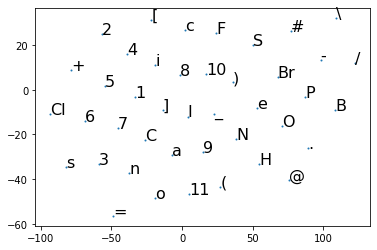

In [34]:
plt.scatter(X_2D[:,0],X_2D[:,1],s=1)
for i , t in enumerate(smiles_dict):
    plt.text(X_2D[i,0],X_2D[i,1], t, fontsize=16)